In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from scipy import ndimage

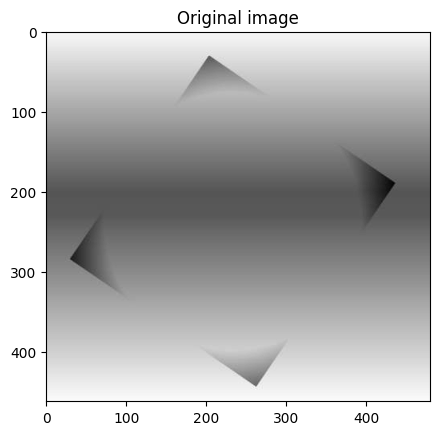

In [9]:
# open image contours.jpg
img = cv.imread('contours.jpg')
# convert to grayscale
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Display the image
plt.figure()
plt.imshow(img_gray, cmap='gray')
plt.title('Original image')
plt.show()

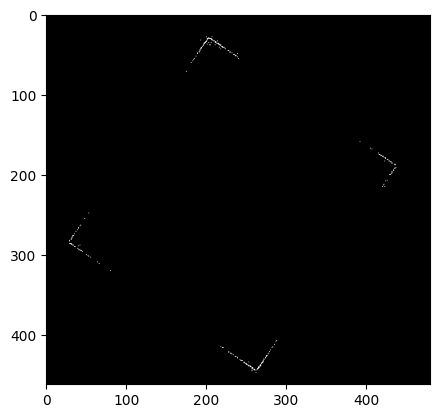

In [15]:
# Produisez une image binaire des contours à l'aide d'un estimateur de gradient et d'un seuil. 
# Vous pourrez utiliser pour cela les fonctions cv.filter2D et np.where des bibliothèques opencv et numpy.  
# Donnez cette image binaire.

def corner_detection(img, threshold=100):
    kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
    contours = cv.filter2D(img,-1,kernel)
    _, contours = cv.threshold(contours, threshold, 255, cv.THRESH_BINARY)
    return contours

# Hopefully see some edges
contours = corner_detection(img_gray, threshold=50)
plt.imshow(contours,cmap="gray")
plt.show()

In [16]:
def imagesc(img1):
    img2 = ((img1 - np.min(img1)) / (np.max(img1) - np.min(img1)))
    plt.imshow(img2, cmap='gray')
    plt.title('Normalized Voting Space')
    plt.show()

# Construct the voting space
angular_intervals = 628
radial_values = np.arange(np.min(img_gray), np.max(img_gray) + 1)
voting_space = np.zeros((angular_intervals, len(radial_values)))

# Perform voting
for y in range(img_gray.shape[0]):
    for x in range(img_gray.shape[1]):
        if img_gray[y, x] > 0:
            for theta in range(angular_intervals):
                r = int(x * np.cos(theta) + y * np.sin(theta))
                if r in radial_values:
                    voting_space[theta, np.where(radial_values == r)] += 1

# Visualize the voting space
imagesc(voting_space)

KeyboardInterrupt: 